In [14]:
from fastai.vision import ImageDataBunch
import pandas as pd

#TODO Put all parameters in one file for consistency
CSV_LOCATION = "image-labels.csv"
GENRE_NAMES = ['Action', 'Adventure', 'Arcade', 'Board Games', 'Card', 'Casual',
       'Educational', 'Family', 'Fighting', 'Indie', 'Massively Multiplayer',
       'Platformer', 'Puzzle', 'RPG', 'Racing', 'Shooter', 'Simulation',
       'Sports', 'Strategy']

In [15]:
with open(CSV_LOCATION, "r", encoding="utf-16") as csv_file:
    df = pd.read_csv(csv_file)

In [16]:
df["image_location"] = df["image_location"].replace("None", None)
df = df.drop_duplicates("id")
df = df.dropna()

In [17]:
other_columns = df.loc[:, df.columns != "genres"]
df = pd.concat([
    other_columns, 
    df["genres"].str.get_dummies(sep="-")
], axis="columns")

In [18]:
df.loc[df["image_location"] == "None"].head()

,id,name,released,rating,image_web,image_location,Action,Adventure,Arcade,Board Games,...,Indie,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy


In [19]:
data = ImageDataBunch.from_df("D:\\", df, valid_pct=0.2, fn_col="image_location", label_col=GENRE_NAMES, size=224)

In [20]:
data.classes

['Action',
 'Adventure',
 'Arcade',
 'Board Games',
 'Card',
 'Casual',
 'Educational',
 'Family',
 'Fighting',
 'Indie',
 'Massively Multiplayer',
 'Platformer',
 'Puzzle',
 'RPG',
 'Racing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

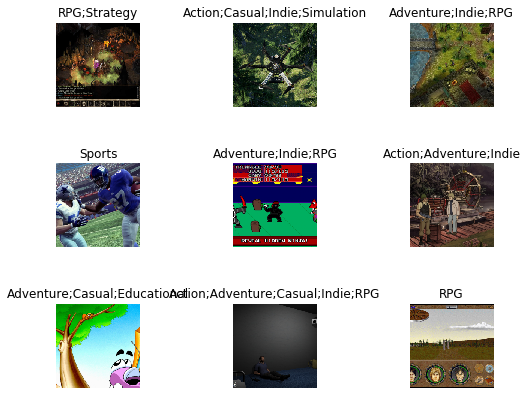

In [21]:
data.show_batch(rows=3, figsize=(7,6))

In [22]:
from fastai.vision import cnn_learner, models
from fastai.metrics import error_rate

In [23]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

In [24]:
learner.fit(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.323438,0.272454,0.685964,03:16
